Maverick P. Rojo

CPE32S8

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
65,5,99,74,27,0,29.0,0.203,32,0
466,0,74,52,10,36,27.8,0.269,22,0
741,3,102,44,20,94,30.8,0.400,26,0
233,4,122,68,0,0,35.0,0.394,29,0
670,6,165,68,26,168,33.6,0.631,49,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 16ms/step - loss: 0.7814 - accuracy: 0.4010 - val_loss: 0.7752 - val_accuracy: 0.4219
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7526 - accuracy: 0.4774 - val_loss: 0.7481 - val_accuracy: 0.4948
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7273 - accuracy: 0.5208 - val_loss: 0.7244 - val_accuracy: 0.5521
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7042 - accuracy: 0.5608 - val_loss: 0.7035 - val_accuracy: 0.5885
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5885 - val_loss: 0.6851 - val_accuracy: 0.6354
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6662 - accuracy: 0.6389 - val_loss: 0.6686 - val_accuracy: 0.6510
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6649 - val_loss: 0.6537 - val_accuracy: 0.6615
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.57913196],
       [0.73177654],
       [0.2981437 ],
       [0.23088543],
       [0.1791545 ],
       [0.57502306],
       [0.02924382],
       [0.2553873 ],
       [0.9224193 ],
       [0.15672083]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.819


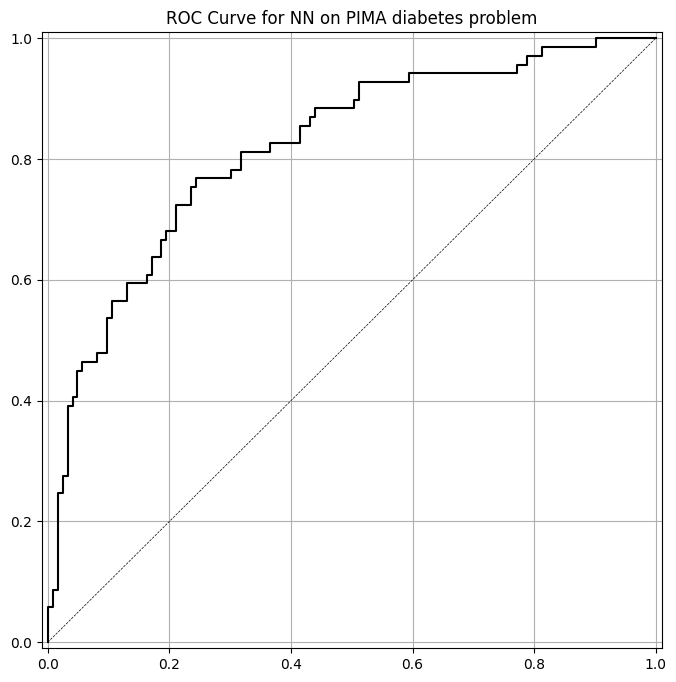

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

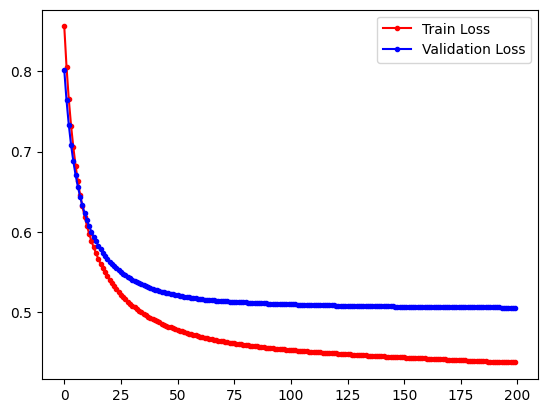

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

That I often see them being used alongside each other for it gives a very valuable information. The training loss tells us how well the model is fitting in our training data whilst the validation loss indicates how well our model is fitting new data. The gap between them tells us whether the model is overfitting or underfitting, it started off great at first (0.8 to 0.6) but then it quickly underfitted approaching the 0.5 mark.


#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
sup_diabetes_df = pd.read_csv('/content/drive/MyDrive/CPE 313-CPE32S8 - Advanced Machine Learning and Deep Learning/HOA 2.2/diabetes.csv')
sup_diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
sup_diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
sup_diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
X = sup_diabetes_df.iloc[:, :-1].values
y = sup_diabetes_df["Outcome"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
sup_model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
sup_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 54        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#LR = .003 EPOCHS = 1500

In [ ]:
sup_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = sup_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 20ms/step - loss: 0.3644 - accuracy: 0.8299 - val_loss: 0.5426 - val_accuracy: 0.7396
Epoch 2/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.3645 - accuracy: 0.8281 - val_loss: 0.5428 - val_accuracy: 0.7344
Epoch 3/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.3643 - accuracy: 0.8316 - val_loss: 0.5431 - val_accuracy: 0.7344
Epoch 4/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.3643 - accuracy: 0.8316 - val_loss: 0.5432 - val_accuracy: 0.7344
Epoch 5/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.3642 - accuracy: 0.8316 - val_loss: 0.5438 - val_accuracy: 0.7344
Epoch 6/1500
18/18 [==============================] - 0s 11ms/step - loss: 0.3644 - accuracy: 0.8316 - val_loss: 0.5435 - val_accuracy: 0.7344
Epoch 7/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.3641 - accuracy: 0.8299 - val_loss: 0.5432 - val_accuracy: 0.7344
Epoc

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

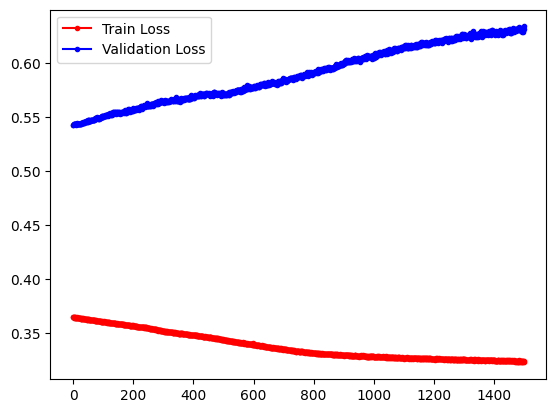

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

####This is a really bad. The initial start was already bad as is and it started to part ways even more.

#LR = .005 EPOCHS = 250

In [ ]:
sup_model.compile(SGD(lr = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = sup_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=250)

Epoch 1/250
18/18 [==============================] - 1s 17ms/step - loss: 0.3222 - accuracy: 0.8576 - val_loss: 0.6417 - val_accuracy: 0.7135
Epoch 2/250
18/18 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8576 - val_loss: 0.6438 - val_accuracy: 0.7135
Epoch 3/250
18/18 [==============================] - 0s 5ms/step - loss: 0.3222 - accuracy: 0.8594 - val_loss: 0.6422 - val_accuracy: 0.7135
Epoch 4/250
18/18 [==============================] - 0s 5ms/step - loss: 0.3218 - accuracy: 0.8576 - val_loss: 0.6395 - val_accuracy: 0.7135
Epoch 5/250
18/18 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8611 - val_loss: 0.6427 - val_accuracy: 0.7135
Epoch 6/250
18/18 [==============================] - 0s 5ms/step - loss: 0.3225 - accuracy: 0.8576 - val_loss: 0.6410 - val_accuracy: 0.7135
Epoch 7/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3216 - accuracy: 0.8646 - val_loss: 0.6448 - val_accuracy: 0.7188
Epoch 8/250


In [ ]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

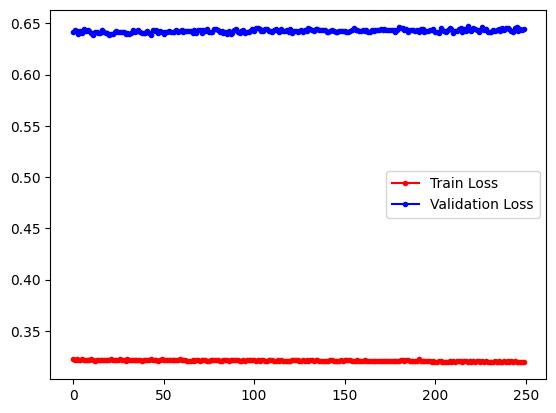

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#It got worse.

#ROC CURVE (LR = .003 EPOCHS = 1500)

In [ ]:
y_pred_class_nn_2 = (sup_model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = sup_model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nn_2[:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_2[:10]

array([[0.5375978 ],
       [0.84764117],
       [0.88236696],
       [0.02938711],
       [0.07325836],
       [0.5988981 ],
       [0.01418466],
       [0.06625995],
       [0.988699  ],
       [0.15067683]], dtype=float32)

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.714
roc-auc is 0.788


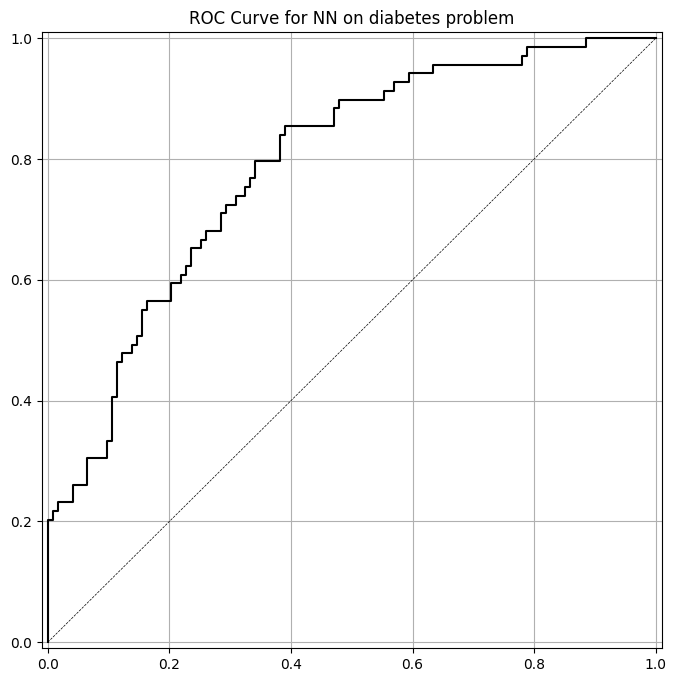

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

The ROC curve is great because it's leaning towars the true positive rate.

#### Conclusion

In this activity we were able to demonstrate as to how we can train neural networks with the help of the keras library. We were able to build as well as train certain neural networks, we were also able to recall our previous lessons that we have learned such as using train loss, validation loss, and ROC curve. We were also able to evaluate and later on plot models by using those aforementioned.